# [Mohammad Shaheer Siddiqi]
# Programming Exercise \#1
---

# Preamble

In [ ]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

In [1]:
# import relevant Python libraries

import numpy as np, pandas as pd
from scipy import stats as sps
from IPython.display import display, Latex
pd.set_option("display.max_columns", 200)

# **1. Fetal Health Classification Dataset**

## **Clean Dataset**

### Problem 1.1

In [ ]:
# load the clean dataset csv file into a pandas dataframe

### fetal_df = pd.read_csv('fetal_health_dataset_clean.csv') ###

#### (a)

_[Based on my understanding, this is a supervised learning problem because the dataset provides labeled features, such as baseline value, accelerations, and fetal movement for each sample. The definition of supervised learning comes from when the model is trained, where the examples of the outcome are known - in this case, we are training a classifier for the X and Y axes and targeting the categorical labels to indicate the class of fetal health.]_

#### (b)

In [2]:
#Print axes and dtypes of the dataframe
fetal_df = pd.read_csv("fetal_health_dataset_clean.csv")

print("axes:", fetal_df.axes)
print("\ndtypes:\n", fetal_df.dtypes)


axes: [RangeIndex(start=0, stop=2126, step=1), Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')]

dtypes:
 baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations              

#### (c)



In [3]:
#Print the first 10 rows of the dataframe
fetal_df.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.000,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,0.0,150,50,200,5,3,76,107,107,170,0,3
6,134,0.001,0.0,0.013,0.008,0.0,0.003,29,6.3,0,0.0,150,50,200,6,3,71,107,106,215,0,3
7,122,0.000,0.0,0.000,0.000,0.0,0.000,83,0.5,6,15.6,68,62,130,0,0,122,122,123,3,1,3
8,122,0.000,0.0,0.002,0.000,0.0,0.000,84,0.5,5,13.6,68,62,130,0,0,122,122,123,3,1,3
9,122,0.000,0.0,0.003,0.000,0.0,0.000,86,0.3,6,10.6,68,62,130,1,0,122,122,123,1,1,3


#### (d)

In [4]:
#Print the number of rows and columns in the dataset
print("shape (rows, columns):", fetal_df.shape)


shape (rows, columns): (2126, 22)


#### (e)

_[Each row in the dataframe represents a sample in the ML engine. It can correspond to one instance of fetal monitoring data with its associated label.]_

#### (f)

_[Total number of samples in this dataset is 2126.]_

#### (g)

_[The dataset has 21 independent variables as follow: baseline value, accelerations, fetal_movement, uterine_contractions, light_decelerations, severe_decelerations, prolongued_decelerations, abnormal_short_term_variability, mean_value_of_short_term_variability, percentage_of_time_with_abnormal_long_term_variability, mean_value_of_long_term_variability, histogram_width, histogram_min, histogram_max, histogram_number_of_peaks, histogram_number_of_zeroes, histogram_mode, histogram_mean, histogram_median, histogram_variance, histogram_tendency.]_

#### (h)

_[There is 1 dependent variable: fetal_health.]_

#### (i)

_[n= numbers of samples (rows) = 2126. p= number of independent variables = 21. Y = R^2126x1]_

#### (j)

_[n = number of samples = 2126. m= number of dependent variables =1. Y = R^2126x1]_

#### (k)

_[The variables in this dataset are raw clinical measurements that came straight from the CTG system, which includes different labelled data such as features... etc which are recorded values not like derived values or transformed features. This actually reflects the monitoring system, and then we preprocess for the ML pipeline.]_


#### (l)

baseline value: 48 unique values, dtype=int64
accelerations: 20 unique values, dtype=float64
fetal_movement: 102 unique values, dtype=float64
uterine_contractions: 16 unique values, dtype=float64
light_decelerations: 16 unique values, dtype=float64
severe_decelerations: 2 unique values, dtype=float64
prolongued_decelerations: 6 unique values, dtype=float64
abnormal_short_term_variability: 75 unique values, dtype=int64
mean_value_of_short_term_variability: 57 unique values, dtype=float64
percentage_of_time_with_abnormal_long_term_variability: 87 unique values, dtype=int64
mean_value_of_long_term_variability: 249 unique values, dtype=float64
histogram_width: 154 unique values, dtype=int64
histogram_min: 109 unique values, dtype=int64
histogram_max: 86 unique values, dtype=int64
histogram_number_of_peaks: 18 unique values, dtype=int64
histogram_number_of_zeroes: 9 unique values, dtype=int64
histogram_mode: 88 unique values, dtype=int64
histogram_mean: 103 unique values, dtype=int64
histog

<Axes: >

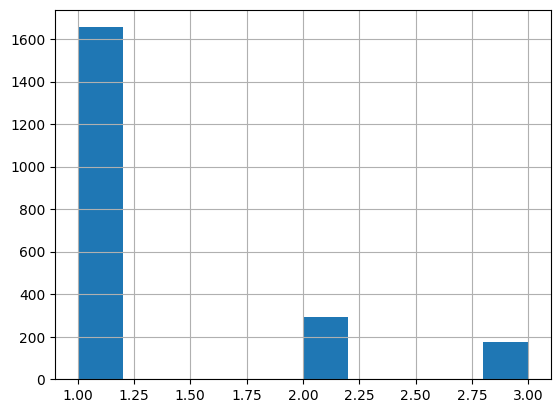

In [5]:
#Find categorical variables
for col in fetal_df.columns:
    unique_vals = fetal_df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values, dtype={fetal_df[col].dtype}")
fetal_df["fetal_health"].hist()



_[The categorical variable in the dataset is fetal_health because it assigns each sample to either 1.00, 2.00 and 3.00, this will me categorical even if its an integer.]_

#### (m)

_[The categorical varaible, fetal_health, is an integer encoding, where the three classes from 1-3 are represented by Normal, Suspect and Pathological.]_

#### (n)

In [6]:
#Count samples by fetal health condition
print(fetal_df["fetal_health"].value_counts().rename({1:"Normal", 2:"Suspect", 3:"Pathological"}))


fetal_health
Normal          1655
Suspect          295
Pathological     176
Name: count, dtype: int64


## **Dirty Dataset**

In [ ]:
# load the dirty dataset csv file into a pandas dataframe

### fetal_dirty_df = pd.read_csv('fetal_health_dataset_dirty.csv') ###

### Problem 1.2

#### (a)

In [7]:
#Check for missing values (NaNs) in the dirty dataset
fetal_dirty_df = pd.read_csv("fetal_health_dataset_dirty.csv")
print("Any missing values?:", fetal_dirty_df.isna().values.any())



Any missing values?: True


#### (b)

In [9]:
#Find which columns have missing values
missing_cols = fetal_dirty_df.columns[fetal_dirty_df.isna().any()].tolist()
print("Columns with missing values:", missing_cols)


Columns with missing values: ['baseline value', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_max', 'histogram_mode']


#### (c)

In [10]:
#Count how many rows contain at least one missing value
rows_with_missing = fetal_dirty_df.isna().any(axis=1).sum()
print("Number of rows with at least one missing value:", rows_with_missing)


Number of rows with at least one missing value: 86


### Problem 1.3

In [11]:
#Check logical consistency and replace invalids with NaN
dfc = fetal_dirty_df.copy()
invalid_mask = (dfc < 0).any(axis=1)
invalid_mask |= ~dfc["baseline value"].between(50, 250)
invalid_mask |= ~dfc["fetal_health"].isin([1, 2, 3])
dfc.loc[invalid_mask, :] = dfc.loc[invalid_mask, :].where(~invalid_mask, other=np.nan)
dfc.loc[91:100]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
91,148.0,0.000,0.000,0.000,0.000,0.0,0.0,67.0,0.4,67.0,4.9,15.0,139.0,154.0,4.0,0.0,150.0,149.0,151.0,0.0,1.0,2.0
92,148.0,0.000,0.003,0.000,0.000,0.0,0.0,70.0,0.3,68.0,5.3,17.0,136.0,153.0,2.0,0.0,150.0,148.0,150.0,0.0,1.0,2.0
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,148.0,0.000,0.005,0.002,0.000,0.0,0.0,72.0,0.3,74.0,4.6,16.0,136.0,152.0,0.0,0.0,150.0,148.0,150.0,0.0,1.0,3.0
95,148.0,0.000,0.000,0.000,0.000,0.0,0.0,58.0,0.5,7.0,9.5,21.0,135.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,1.0
96,148.0,0.000,0.000,0.000,0.000,0.0,0.0,63.0,0.4,30.0,8.8,35.0,121.0,156.0,3.0,1.0,150.0,149.0,151.0,1.0,1.0,2.0
97,148.0,0.000,0.001,0.000,0.001,0.0,0.0,60.0,0.5,49.0,4.8,83.0,78.0,161.0,3.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
98,148.0,0.000,0.001,0.000,0.001,0.0,0.0,61.0,0.5,39.0,6.3,31.0,130.0,161.0,2.0,0.0,154.0,152.0,154.0,1.0,1.0,2.0
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,125.0,0.005,0.000,0.002,0.003,0.0,0.0,25.0,1.7,6.0,11.6,93.0,72.0,165.0,3.0,0.0,133.0,128.0,132.0,10.0,0.0,1.0


_[I ensured that no feature can take negative values because heart rate and contractions obviously can't be negative. The baseline fetal heart rate is restricted to 50-250 bpm. The target label fetal_health in the last column takes categorical values from 1,2, and 3. If any of the values are failing, it will be replaced with NaN.]_

### Problem 1.4

In [12]:
#Z-score normalization while ignoring NaN
proc = dfc.copy()
label_col = "fetal_health"
cat_cols = [label_col]
num_cols = [c for c in proc.columns if c not in cat_cols and pd.api.types.is_numeric_dtype(proc[c])]
proc[num_cols] = (proc[num_cols] - proc[num_cols].mean()) / proc[num_cols].std()
proc.head(20)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.454527,-0.830330,-0.202307,-1.481775,-0.644478,-0.022863,-0.247235,1.570932,-0.942261,1.842950,-1.067577,-0.170879,-1.049736,-2.189266,-0.711994,-0.455901,-1.366128,0.075824,-1.405823,2.158053,1.148085,2.0
1,-0.193333,0.701417,-0.202307,0.548524,0.389533,-0.022863,-0.247235,-1.725075,0.875393,-0.532625,0.341398,1.555803,-0.845563,2.019355,0.650051,0.926252,0.123747,0.005581,0.042969,-0.215124,-0.870561,1.0
2,-0.088233,-0.064457,-0.202307,1.225290,0.389533,-0.022863,-0.247235,-1.783932,0.875393,-0.532625,0.869764,1.555803,-0.845563,2.019355,0.309539,0.926252,0.123747,-0.064662,-0.109535,-0.176219,-0.870561,1.0
3,0.016866,-0.064457,-0.202307,1.225290,0.389533,-0.022863,-0.247235,-1.783932,1.216203,-0.532625,2.560534,1.215699,-1.355996,0.382669,2.352606,-0.455901,-0.160039,-0.134904,-0.185788,-0.176219,1.148085,1.0
4,-0.193333,0.956708,-0.202307,1.225290,-0.644478,-0.022863,-0.247235,-1.783932,1.216203,-0.532625,2.014556,1.215699,-1.355996,0.382669,1.671584,-0.455901,-0.160039,0.005581,-0.109535,-0.254029,1.148085,1.0
5,0.016866,-0.575039,-0.202307,1.902056,2.457556,-0.022863,4.032944,-1.195359,5.192321,-0.532625,-1.490269,2.079040,-1.458083,2.136261,0.309539,3.690557,-4.487772,-2.031458,-2.473355,5.931792,-0.870561,3.0
6,0.016866,-0.575039,-0.202307,2.917205,2.112885,-0.022863,6.173033,-1.018788,5.646735,-0.532625,-1.490269,2.079040,-1.458083,2.136261,0.650051,3.690557,-4.842505,-2.031458,-2.549607,7.682497,-0.870561,3.0
7,-1.244328,-0.830330,-0.202307,-1.481775,-0.644478,-0.022863,-0.247235,2.159505,-0.942261,-0.201150,1.257232,-0.066232,-1.049736,-1.955454,-1.393016,-0.455901,-1.224235,-0.977817,-1.253319,-0.565265,1.148085,3.0
8,-1.244328,-0.830330,-0.202307,-0.805009,-0.644478,-0.022863,-0.247235,2.218362,-0.942261,-0.256396,0.904988,-0.066232,-1.049736,-1.955454,-1.393016,-0.455901,-1.224235,-0.977817,-1.253319,-0.565265,1.148085,3.0
9,-1.244328,-0.830330,-0.202307,-0.466626,-0.644478,-0.022863,-0.247235,2.336076,-1.169467,-0.201150,0.376623,-0.066232,-1.049736,-1.955454,-1.052505,-0.455901,-1.224235,-0.977817,-1.253319,-0.643074,1.148085,3.0


### Problem 1.5

In [13]:
#Median within each fetal_health class

imputed = proc.copy()  
label_col = "fetal_health"
num_cols = [c for c in imputed.columns
            if c != label_col and pd.api.types.is_numeric_dtype(imputed[c])]

for c in num_cols:
    imputed[c] = imputed[c].fillna(imputed.groupby(label_col)[c].transform("median"))

imputed.head(10)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.454527,-0.830330,-0.202307,-1.481775,-0.644478,-0.022863,-0.247235,1.570932,-0.942261,1.842950,-1.067577,-0.170879,-1.049736,-2.189266,-0.711994,-0.455901,-1.366128,0.075824,-1.405823,2.158053,1.148085,2.0
1,-0.193333,0.701417,-0.202307,0.548524,0.389533,-0.022863,-0.247235,-1.725075,0.875393,-0.532625,0.341398,1.555803,-0.845563,2.019355,0.650051,0.926252,0.123747,0.005581,0.042969,-0.215124,-0.870561,1.0
2,-0.088233,-0.064457,-0.202307,1.225290,0.389533,-0.022863,-0.247235,-1.783932,0.875393,-0.532625,0.869764,1.555803,-0.845563,2.019355,0.309539,0.926252,0.123747,-0.064662,-0.109535,-0.176219,-0.870561,1.0
3,0.016866,-0.064457,-0.202307,1.225290,0.389533,-0.022863,-0.247235,-1.783932,1.216203,-0.532625,2.560534,1.215699,-1.355996,0.382669,2.352606,-0.455901,-0.160039,-0.134904,-0.185788,-0.176219,1.148085,1.0
4,-0.193333,0.956708,-0.202307,1.225290,-0.644478,-0.022863,-0.247235,-1.783932,1.216203,-0.532625,2.014556,1.215699,-1.355996,0.382669,1.671584,-0.455901,-0.160039,0.005581,-0.109535,-0.254029,1.148085,1.0
5,0.016866,-0.575039,-0.202307,1.902056,2.457556,-0.022863,4.032944,-1.195359,5.192321,-0.532625,-1.490269,2.079040,-1.458083,2.136261,0.309539,3.690557,-4.487772,-2.031458,-2.473355,5.931792,-0.870561,3.0
6,0.016866,-0.575039,-0.202307,2.917205,2.112885,-0.022863,6.173033,-1.018788,5.646735,-0.532625,-1.490269,2.079040,-1.458083,2.136261,0.650051,3.690557,-4.842505,-2.031458,-2.549607,7.682497,-0.870561,3.0
7,-1.244328,-0.830330,-0.202307,-1.481775,-0.644478,-0.022863,-0.247235,2.159505,-0.942261,-0.201150,1.257232,-0.066232,-1.049736,-1.955454,-1.393016,-0.455901,-1.224235,-0.977817,-1.253319,-0.565265,1.148085,3.0
8,-1.244328,-0.830330,-0.202307,-0.805009,-0.644478,-0.022863,-0.247235,2.218362,-0.942261,-0.256396,0.904988,-0.066232,-1.049736,-1.955454,-1.393016,-0.455901,-1.224235,-0.977817,-1.253319,-0.565265,1.148085,3.0
9,-1.244328,-0.830330,-0.202307,-0.466626,-0.644478,-0.022863,-0.247235,2.336076,-1.169467,-0.201150,0.376623,-0.066232,-1.049736,-1.955454,-1.052505,-0.455901,-1.224235,-0.977817,-1.253319,-0.643074,1.148085,3.0


### Problem 1.6

In [14]:
#One hot encode the label and save the processed dataframe
final_fetal = pd.get_dummies(imputed, columns=["fetal_health"], prefix="fetal_health")

#Saving
final_fetal.to_csv("fetal_health_dataset_processed.csv", index=False)

print("Processed dataset saved as fetal_health_dataset_processed.csv")
final_fetal.head(10)


Processed dataset saved as fetal_health_dataset_processed.csv


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health_1.0,fetal_health_2.0,fetal_health_3.0
0,-1.454527,-0.830330,-0.202307,-1.481775,-0.644478,-0.022863,-0.247235,1.570932,-0.942261,1.842950,-1.067577,-0.170879,-1.049736,-2.189266,-0.711994,-0.455901,-1.366128,0.075824,-1.405823,2.158053,1.148085,False,True,False
1,-0.193333,0.701417,-0.202307,0.548524,0.389533,-0.022863,-0.247235,-1.725075,0.875393,-0.532625,0.341398,1.555803,-0.845563,2.019355,0.650051,0.926252,0.123747,0.005581,0.042969,-0.215124,-0.870561,True,False,False
2,-0.088233,-0.064457,-0.202307,1.225290,0.389533,-0.022863,-0.247235,-1.783932,0.875393,-0.532625,0.869764,1.555803,-0.845563,2.019355,0.309539,0.926252,0.123747,-0.064662,-0.109535,-0.176219,-0.870561,True,False,False
3,0.016866,-0.064457,-0.202307,1.225290,0.389533,-0.022863,-0.247235,-1.783932,1.216203,-0.532625,2.560534,1.215699,-1.355996,0.382669,2.352606,-0.455901,-0.160039,-0.134904,-0.185788,-0.176219,1.148085,True,False,False
4,-0.193333,0.956708,-0.202307,1.225290,-0.644478,-0.022863,-0.247235,-1.783932,1.216203,-0.532625,2.014556,1.215699,-1.355996,0.382669,1.671584,-0.455901,-0.160039,0.005581,-0.109535,-0.254029,1.148085,True,False,False
5,0.016866,-0.575039,-0.202307,1.902056,2.457556,-0.022863,4.032944,-1.195359,5.192321,-0.532625,-1.490269,2.079040,-1.458083,2.136261,0.309539,3.690557,-4.487772,-2.031458,-2.473355,5.931792,-0.870561,False,False,True
6,0.016866,-0.575039,-0.202307,2.917205,2.112885,-0.022863,6.173033,-1.018788,5.646735,-0.532625,-1.490269,2.079040,-1.458083,2.136261,0.650051,3.690557,-4.842505,-2.031458,-2.549607,7.682497,-0.870561,False,False,True
7,-1.244328,-0.830330,-0.202307,-1.481775,-0.644478,-0.022863,-0.247235,2.159505,-0.942261,-0.201150,1.257232,-0.066232,-1.049736,-1.955454,-1.393016,-0.455901,-1.224235,-0.977817,-1.253319,-0.565265,1.148085,False,False,True
8,-1.244328,-0.830330,-0.202307,-0.805009,-0.644478,-0.022863,-0.247235,2.218362,-0.942261,-0.256396,0.904988,-0.066232,-1.049736,-1.955454,-1.393016,-0.455901,-1.224235,-0.977817,-1.253319,-0.565265,1.148085,False,False,True
9,-1.244328,-0.830330,-0.202307,-0.466626,-0.644478,-0.022863,-0.247235,2.336076,-1.169467,-0.201150,0.376623,-0.066232,-1.049736,-1.955454,-1.052505,-0.455901,-1.224235,-0.977817,-1.253319,-0.643074,1.148085,False,False,True


# **2. Heart Failure Prediction Dataset**

## Problem 2.1

In [ ]:
# load the dataset csv file into a pandas dataframe

### heart_df = pd.read_csv('heart_failure_dataset.csv') ###

### (a)

_[This is supervised learning because each row has input features, like the age and different attributes, and the known target label DEATH_EVENT (0/1). So we want to predict death based on heart failure from the patient attributes.]_

### (b)

In [15]:
#Print axes and dtypes
heart_df = pd.read_csv("heart_failure_dataset.csv")
print("axes:", heart_df.axes)
print("\ndtypes:\n", heart_df.dtypes)


axes: [RangeIndex(start=0, stop=299, step=1), Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')]

dtypes:
 age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


### (c)



In [16]:
#Print first 10 rows
heart_df.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### (d)

In [17]:
#Print number of rows and columns
print("shape (rows, columns):", heart_df.shape)


shape (rows, columns): (299, 13)


### (e)

_[The toal number of samples is 299.]_

### (f)

_[There are 12 independent variables in this dataset. age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time. ]_

### (g)

_[There is 1 dependent variable, DEATH_EVENT. It also represents the output of that in binary, for dead or survived.]_

### (h)

_[n= 299 -> rows, p= 12 independent variables. X=R^299x12]_

### (i)

_[n= 299, m= 1 dependent variable. Y=R^299x1]_

### (j)

In [18]:
#Determine categorical variables

for col in heart_df.columns:
    u = heart_df[col].dropna().unique()
    print(f"{col}: {len(u)} unique values | sample uniques: {np.sort(u)[:12]}")
    
binary_cats = [c for c in heart_df.columns
               if set(heart_df[c].dropna().unique()).issubset({0, 1})]

print("\nBinary (0/1) categorical columns:", binary_cats)


age: 47 unique values | sample uniques: [40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]
anaemia: 2 unique values | sample uniques: [0 1]
creatinine_phosphokinase: 208 unique values | sample uniques: [23 30 47 52 53 54 55 56 57 58 59 60]
diabetes: 2 unique values | sample uniques: [0 1]
ejection_fraction: 17 unique values | sample uniques: [14 15 17 20 25 30 35 38 40 45 50 55]
high_blood_pressure: 2 unique values | sample uniques: [0 1]
platelets: 176 unique values | sample uniques: [ 25100.  47000.  51000.  62000.  70000.  73000.  75000.  87000. 105000.
 119000. 122000. 126000.]
serum_creatinine: 40 unique values | sample uniques: [0.5  0.6  0.7  0.75 0.8  0.9  1.   1.1  1.18 1.2  1.3  1.4 ]
serum_sodium: 27 unique values | sample uniques: [113 116 121 124 125 126 127 128 129 130 131 132]
sex: 2 unique values | sample uniques: [0 1]
smoking: 2 unique values | sample uniques: [0 1]
time: 148 unique values | sample uniques: [ 4  6  7  8 10 11 12 13 14 15 16 20]
DEATH_EVENT: 2 unique va

_[There are 6 categorical variables, anaemia, diabetes, high_blood_pressure, sex, smoking, and  DEATH_EVENT. These can only take on two discrete binary value, so they will be represented in categories.]_

### (k)

_[The catgegorical variables use binary integer encoding because the answers are stored as 0/1 indicating yes or no.]_

### (l)

In [21]:
#Count the deceased and the alive patients
print(heart_df["DEATH_EVENT"].value_counts().rename({0: "Alive", 1: "Deceased"}))


DEATH_EVENT
Alive       203
Deceased     96
Name: count, dtype: int64


### (m)

In [22]:
#Count female vs male patients
print(heart_df["sex"].value_counts().rename({0: "Female", 1: "Male"}))


sex
Male      194
Female    105
Name: count, dtype: int64


### (n)

In [23]:
#Count smokers vs non-smokers
print(heart_df["smoking"].value_counts().rename({0: "Non-smoker", 1: "Smoker"}))


smoking
Non-smoker    203
Smoker         96
Name: count, dtype: int64


## Problem 2.2

In [25]:
#Logical checks

dh = heart_df.copy()

#1: No negative values allowed
for col in dh.columns:
    if pd.api.types.is_numeric_dtype(dh[col]):
        dh.loc[dh[col] < 0, col] = np.nan

#2: Age between 0 and 120
dh.loc[~dh["age"].between(0, 120), "age"] = np.nan

#3: Ejection fraction between 0 and 100
dh.loc[~dh["ejection_fraction"].between(0, 100), "ejection_fraction"] = np.nan

#4: Serum sodium between 100 and 200
dh.loc[~dh["serum_sodium"].between(100, 200), "serum_sodium"] = np.nan

#5: Binary columns must be 0 or 1
for col in ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]:
    dh.loc[~dh[col].isin([0, 1]), col] = np.nan

# Quick check for NaNs
print("NaN counts after logical validation:\n", dh.isna().sum())



NaN counts after logical validation:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


_[To apply logical checks, so no feature has negative values, to avoid NaN, age was between 0-120, ejections fraction between 0-100, serium sodium between 100-200, and the binary terms were restricted to those values {0,1}]._

## Problem 2.3

In [27]:
#Z-score normalization of numeric features, ignoring NaNs.
proc_heart = dh.copy()  

label_col = "DEATH_EVENT"
cat_cols = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", label_col]

num_cols = [c for c in proc_heart.columns if c not in cat_cols]

proc_heart[num_cols] = (proc_heart[num_cols] - proc_heart[num_cols].mean()) / proc_heart[num_cols].std()

proc_heart.head(20)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.190949,0.0,0.000165,0.0,-1.527998,1.0,1.678834e-02,0.489237,-1.501519,1.0,0.0,-1.626775,1.0
1,-0.490457,0.0,7.502063,0.0,-0.007065,0.0,7.523048e-09,-0.284076,-0.141739,1.0,0.0,-1.601007,1.0
2,0.350246,0.0,-0.449186,0.0,-1.527998,0.0,-1.036336e+00,-0.090748,-1.728149,1.0,1.0,-1.588122,1.0
3,-0.910808,1.0,-0.485257,0.0,-1.527998,0.0,-5.455595e-01,0.489237,0.084892,1.0,0.0,-1.588122,1.0
4,0.350246,1.0,-0.434757,1.0,-1.527998,0.0,6.507077e-01,1.262550,-4.674340,0.0,0.0,-1.575238,1.0
5,2.452003,1.0,-0.551217,0.0,0.161928,1.0,-6.069065e-01,0.682565,-1.048259,1.0,1.0,-1.575238,1.0
6,1.190949,1.0,-0.346124,0.0,-1.950479,0.0,-1.394193e+00,-0.187412,0.084892,1.0,0.0,-1.549470,1.0
7,-0.070106,1.0,-0.275011,1.0,1.851853,0.0,1.949220e+00,-0.284076,-1.274889,1.0,1.0,-1.549470,1.0
8,0.350246,0.0,-0.437849,0.0,2.274335,0.0,7.523048e-09,0.102580,0.311522,0.0,0.0,-1.549470,1.0
9,1.611300,1.0,-0.472890,0.0,-0.260554,1.0,1.274403e+00,7.739045,-0.821629,1.0,1.0,-1.549470,1.0


## Problem 2.4

In [28]:
#One-hot encode DEATH_EVENT and save processed dataframe

final_heart = pd.get_dummies(proc_heart, columns=["DEATH_EVENT"], prefix="DEATH_EVENT")

final_heart.to_csv("heart_failure_dataset_processed.csv", index=False)

print("Processed dataset saved as heart_failure_dataset_processed.csv")
final_heart.head(10)


Processed dataset saved as heart_failure_dataset_processed.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT_0.0,DEATH_EVENT_1.0
0,1.190949,0.0,0.000165,0.0,-1.527998,1.0,1.678834e-02,0.489237,-1.501519,1.0,0.0,-1.626775,False,True
1,-0.490457,0.0,7.502063,0.0,-0.007065,0.0,7.523048e-09,-0.284076,-0.141739,1.0,0.0,-1.601007,False,True
2,0.350246,0.0,-0.449186,0.0,-1.527998,0.0,-1.036336e+00,-0.090748,-1.728149,1.0,1.0,-1.588122,False,True
3,-0.910808,1.0,-0.485257,0.0,-1.527998,0.0,-5.455595e-01,0.489237,0.084892,1.0,0.0,-1.588122,False,True
4,0.350246,1.0,-0.434757,1.0,-1.527998,0.0,6.507077e-01,1.262550,-4.674340,0.0,0.0,-1.575238,False,True
5,2.452003,1.0,-0.551217,0.0,0.161928,1.0,-6.069065e-01,0.682565,-1.048259,1.0,1.0,-1.575238,False,True
6,1.190949,1.0,-0.346124,0.0,-1.950479,0.0,-1.394193e+00,-0.187412,0.084892,1.0,0.0,-1.549470,False,True
7,-0.070106,1.0,-0.275011,1.0,1.851853,0.0,1.949220e+00,-0.284076,-1.274889,1.0,1.0,-1.549470,False,True
8,0.350246,0.0,-0.437849,0.0,2.274335,0.0,7.523048e-09,0.102580,0.311522,0.0,0.0,-1.549470,False,True
9,1.611300,1.0,-0.472890,0.0,-0.260554,1.0,1.274403e+00,7.739045,-0.821629,1.0,1.0,-1.549470,False,True


## Problem 2.5

In [29]:
#Correlation analysis
corr = heart_df.corr(numeric_only=True)

#Sort
target_corr = corr["DEATH_EVENT"].drop("DEATH_EVENT")

print("Correlations with DEATH_EVENT:\n", target_corr.sort_values(ascending=False))

#Most positively correlated 
print("\nMost positively correlated variables:")
print(target_corr.sort_values(ascending=False).head(2))

#Most negatively correlated 
print("\nMost negatively correlated variables:")
print(target_corr.sort_values().head(2))


Correlations with DEATH_EVENT:
 serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Most positively correlated variables:
serum_creatinine    0.294278
age                 0.253729
Name: DEATH_EVENT, dtype: float64

Most negatively correlated variables:
time                -0.526964
ejection_fraction   -0.268603
Name: DEATH_EVENT, dtype: float64


### (a)

_[Two variables that are positively correlated with the DEATH_EVENT variable is serum_creatinine and age. ]_

### (b)

_[_[Two variables that are negatively correlated with the DEATH_EVENT variable is ejection_fraction and serum_sodium.]_]_

### (c)

_[serum_creatinine correlates positively with death because this indicates poor kidney function, which increases the mortality risk in heart failure patients. Along with age.]_

### (d)

_[ejection_fraction is negatively correlated with death because this reflects that the heart has a weaker pumping capacity, which will lead to higher risk of mortality. ]_